In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Лабораторная работа
## Задача 6.1
$$ f'(x) = \frac{af(x) + bf(x - 10h) + cf(x - 12h) + df(x + 3h)}{h} $$

1. Определить коэффициенты a, b, c, d так, чтобы формула имела максимальный порядок точности.   

$$ r h = - f'(x)h +  $$
$$+ af(x)   + $$
$$+ b(f(x) - 10h f'(x) + \frac{100 h^2}{2}f''(x) - \frac{1000 h^3}{6}f'''(x) +\frac{10000 h^4}{24}f^{(4)}(x) + (...)) + $$  
$$+ c(f(x) - 12h f'(x) + \frac{144 h^2}{2}f''(x) - \frac{1728 h^3}{6}f'''(x) +\frac{20736 h^4}{24}f^{(4)}(x) + (...)) + $$   
$$+ d(f(x) + 3h f'(x) + \frac{9 h^2}{2}f''(x) + \frac{27 h^3}{6}f'''(x) +\frac{81 h^4}{24}f^{(4)}(x) + (...)) $$  
$$ rh = 
f(x) (a + b + c + d) + 
f'(x)h(10b - 12c + 3d - 1) + 
f''(x) h^2(50b + 72c + \frac{9}{2}d ) + 
f'''(x) h^3 (\frac{1000}{6}b - \frac{1728}{6}c + \frac{27}{6}d) + 
f^{(4)} h^4 (\frac{10000}{24}b + \frac{20736}{24}c + \frac{81}{24}d )  + (...)
 $$  
Преобразуем в слау
$$
\begin{equation*}
    \begin{cases}
    a + b + c + d = 0     \\
    - 10b - 12c + 3d = 1 \\
    50b + 72c + \frac{9}{2}d = 0\\
    - \frac{1000}{6}b - \frac{1728}{6}c + \frac{27}{6}d = 0
    \end{cases}
\end{equation*}  
$$
Данная система имеет решение
$$
\begin{equation*}
    \begin{cases}
        a = \frac{-3}{20} \\
        b = \frac{-9}{65} \\
        c = \frac{1}{12} \\
        d = \frac{8}{39}
    \end{cases}
\end{equation*}  
$$ 


В таком случае будем иметь $r h = f^{(4)} h^4 (...)  + (...) $ Но нельзя забывать, что нужно поделить все на h (так как левая часть у нас r h)   
А значит имеем $ r = f^{(4)} h^3 (...)  + (...)  $
 
Итого 3 порядок точности формулы $$  f'(x) = \frac{f(x)\frac{-3}{20} - f(x-10h)\frac{9}{65} + f(x-12h)\frac{1}{12} + f(x+3h)\frac{8}{39}}{h} $$

2.  Реализовать программно полученную формулу численного дифференцирования и формулу правой разностной производной. 

In [4]:
#Моя функция
def myFunc(x, f, h): 
    return (-3/20 * f(x) - 9/65 * f(x-10*h) + 1/12 * f(x-12*h) + 8/39 * f(x+3*h) )/h

#Правая разность
def rightDiff(x, f, h):
    return (f(x + h) - f(x))/h

3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1. На отрезке [a,b] построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг  h0=0.0001 .   
Формула из 5.1 $f(x) = 0.8 + 6.5x - 4.4x^2 + 6.1x^3$

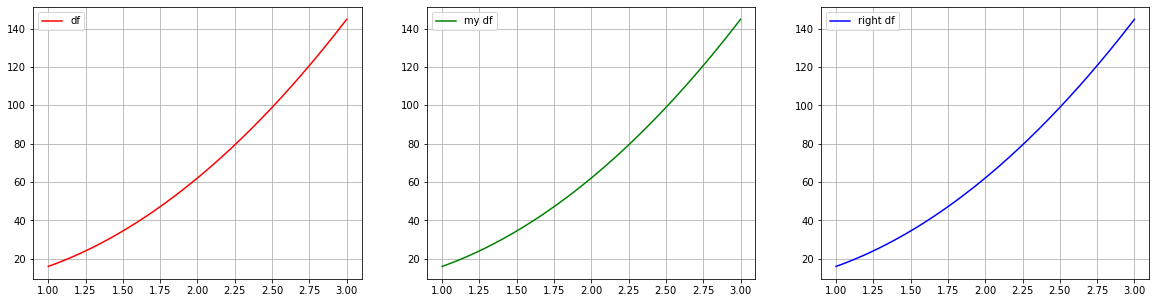

In [5]:
#Контрольная функция из 5.1
def controlFunc(x):
    return 0.8 + 6.5*x - 4.4*x**2 + 6.1*x**3

#Дифференциал контрольной функции
def dcontrolFunc(x):
    return 6.5 - 8.8 * x + 18.3 * x**2

#Значения a и b
a = 1
b = 3

#Построим графики
h0 = 0.0001
x = np.linspace(a, b, 1000)
true_df = dcontrolFunc(x)

#Построим истинное значение
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(x, true_df, label = "df", color = "red")
axs[0].grid()
axs[0].legend()

#Построим наше значение функции
my_df = myFunc(x, controlFunc, h0)
axs[1].plot(x, my_df, label = "my df", color = "green")
axs[1].grid()
axs[1].legend()

#Построим значение правой функции
right_df = rightDiff(x, controlFunc, h0)
axs[2].plot(x, right_df, label = "right df", color = "blue")
axs[2].grid()
axs[2].legend()


4. Взять функцию из задачи 5.2. Выбрать фиксированную точку на отрезке [a,b] и вычислить значения производных  по формулам  численного дифференцирования,  уменьшая шаг дифференцирования  h0=0.1 последовательно в 10 раз: , k=0,1,2,…Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования.  По полученным данным построить графики погрешностей.   
Формула из 5.2 $f(x) = x cos^2(4x)$

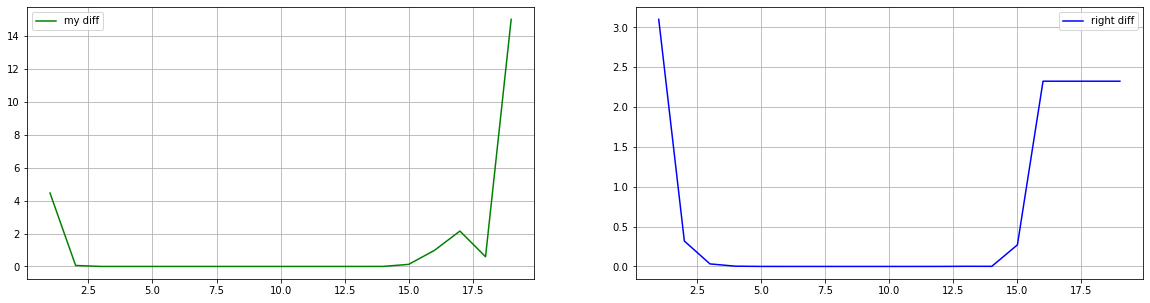

In [6]:
# Функция из 5.2
def taskFunc(x):
    return x * np.cos(4*x)**2

#Дифференциал функции из 5.2
def dtaskFunc(x):
    return np.cos(4*x)**2 - 8*x*np.cos(4*x)*np.sin(4*x)

#a = -4, b = 0, поэтому взял середину отрезка
c = -2

epsilonsMy = []
epsilonsRight = []
h0 = 0.1
for i in np.arange(1, 20):
    epsilonsMy.append(np.abs(dtaskFunc(c) - myFunc(c, taskFunc, h0)))
    epsilonsRight.append(np.abs(dtaskFunc(c) - rightDiff(c, taskFunc, h0)))
    h0 *= 0.1
    

fig, axs = plt.subplots(1, 2, figsize = (20, 5))
axs[0].plot(np.arange(1, 20), epsilonsMy, color = "green", label = "my diff")
axs[1].plot(np.arange(1, 20), epsilonsRight, color = "blue", label = "right diff")
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

Проанализируем следующий график:
1) Наша функция немного лучше функции правых    
2) После 15 итерации $10^{-16}$ уже проявляется машинная ошибка окгруления, поэтому слишком   
3) Оптимальное число k для нашего метода = 3, а для метода правых = 5   

Теперь напишем тестовую функцию, погрешность которой должна быть близка к нулевой. Возьмем для нее многочлен 3 степени

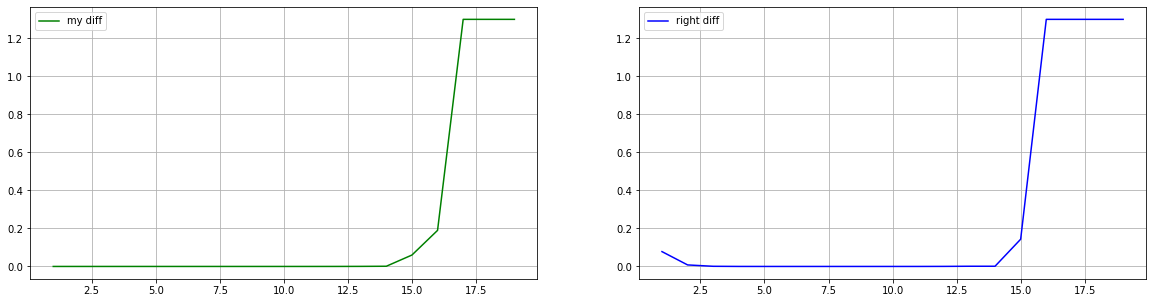

In [7]:
#Тестовая функция
def testFunc(x):
    return 0.5*x + 0.4*x**2+ 0.2*x**3
#Дифференциал тестовой функции
def dtestFunc(x):
    return 0.5 + 0.8*x + 0.6*x**2

#Точка дифференциирования
c = -2

epsilonsMy = []
epsilonsRight = []
h0 = 0.1
for i in np.arange(1, 20):
    epsilonsMy.append(np.abs(dtestFunc(c) - myFunc(c, testFunc, h0)))
    epsilonsRight.append(np.abs(dtestFunc(c) - rightDiff(c, testFunc, h0)))
    h0 *= 0.1
    

fig, axs = plt.subplots(1, 2, figsize = (20, 5))
axs[0].plot(np.arange(1, 20), epsilonsMy, color = "green", label = "my diff")
axs[1].plot(np.arange(1, 20), epsilonsRight, color = "blue", label = "right diff")
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()


In [8]:

print("             h             |          right eps      |         my eps   ")    
print("___________________________________________________________________________")    
for i in range(1, 19):
    print("  %.18lf     |  %.18lf   | %.18lf    " % (0.1**i, epsilonsRight[i], epsilonsMy[i]))

             h             |          right eps      |         my eps   
___________________________________________________________________________
  0.100000000000000006     |  0.007979999999995213   | 0.000000000000006661    
  0.010000000000000002     |  0.000799800000149675   | 0.000000000000059952    
  0.001000000000000000     |  0.000079998000811710   | 0.000000000000365485    
  0.000100000000000000     |  0.000007999974382056   | 0.000000000009626522    
  0.000010000000000000     |  0.000000800044840599   | 0.000000000092893249    
  0.000001000000000000     |  0.000000077844763302   | 0.000000000703515690    
  0.000000100000000000     |  0.000000025664281145   | 0.000000000684263091    
  0.000000010000000000     |  0.000000107562481810   | 0.000000024295754963    
  0.000000001000000000     |  0.000000107562481810   | 0.000000107562481810    
  0.000000000100000000     |  0.000017656005912192   | 0.000001772897018748    
  0.000000000010000000     |  0.000293206440982852 

Рассмотрим таблицу. Метод правых имеет погрешность, пусть и небольшую, но 6 итераций (до $0.1^6$) она падает. Дальше уже начинается рост погрешности у обоих методов (это вычислительная погрешность). Наш метод как и предполагалось сразу имеет нулевую (или около нулевую) погрешность.

## Задача 6.2.  
Найти  приближенное решение  задачи Коши для обыкновенного дифференциального  уравнения (ОДУ) 1 порядка с точностью $\epsilon  = 10^{-6}$.   
y' = r(t)y(t)
Заданная функция: $r(t) = -2sin(2t) + 0.2$    
$y(t_0) = y_0 $   
$t ∈ [0, \frac{\pi}{2}]$   $ y_0 = e $

### Аналитическое решение   
1. Найти аналитическое решение задачи   

$$y' = (-2sin(2t) + 0.2)y$$
$$ \frac{dy}{dt}y = -2sin(2t) + 0.2$$    
$$   \frac{dy}{y} = -2sin(2t)dt + 0.2dt$$  
$$ \int \frac{dy}{y} = -2\int sin(2t)dt + 0.2 \int dt $$   
$$  \log(y) = cos(2t) + 0.2t + CONST $$  
$$ y = e^{cos(2t) + 0.2t} + CONST* $$  

подставим t0 = 0     
$e = e + CONST = 0$  
Итого имеем $ y = e^{cos(2t) + 0.2t} $   

2. Составить  программу вычисления  решения  методом Эйлера с  заданной точностью, используя правило Рунге. Найти решение задачи с точностью $\epsilon = 10^{-6}$ , число точек N и шаг, при котором точность достигается.    Построить график решения.

In [9]:
#Функция
def function(t, y):
    return -y*np.sin(t) + 4 * np.sin(t)

def realDiffFunction(t):
    return np.exp(np.cos(2*t) + 0.2*t)

#Метод Эйлера
def eilerFunc(y_0, t_0, h, n, main_func):
    current_y = y_0
    current_t = t_0
    for i in range(n):
        current_y = current_y + h * main_func(current_t, current_y)
        current_t = current_t + h
        #print('t{}: '.format(i + 1),current_t, " y{}: ".format(i + 1),current_y)

    return current_y
    
#Уточнение по Рунге
def getRunge(y_0, t_0, h, n, difff, main_func, p):
    return (difff(y_0, t_0, h/2, n*2, main_func) - difff(y_0, t_0, h, n, main_func))/(2**p - 1)

In [10]:
#Зададим точность
eps = 1e-3

#Возьмем точку в которой будем считать нашу фунцию
start_point = 0
point = np.pi/4
y_0 = np.e;
t_0 = 0

#Число разбиений
n = 2
h = (point - start_point)/n

#Метаданные для построения графиков
n_list = [2]
value_list = [eilerFunc(y_0, t_0, h, n, function)]
runge_epsilon_list = [getRunge(y_0, t_0, h, n, eilerFunc, function, 1)]

while np.abs(getRunge(y_0, t_0, h, n, eilerFunc, function, 1)) > eps:
    n += 1
    h = (point - start_point)/n
    n_list.append(n)
    value_list.append(eilerFunc(y_0, t_0, h, n, function))
    runge_epsilon_list.append(getRunge(y_0, t_0, h, n, eilerFunc, function, 1))

In [11]:
print("Количество разбиений: ", n)
print("Разбиение: ",h)
print("Значение функции по n разбиеням h: ",eilerFunc(y_0, t_0, h, n, function))
print("Реальное значение: ",realDiffFunction(point))
print("Eps",np.abs(eilerFunc(y_0, t_0, h, n, function) - realDiffFunction(point)))
print("Eps по Рунге: ", np.abs(getRunge(y_0, t_0, h, n+1, eilerFunc, function, 1)))

Количество разбиений:  107
Разбиение:  0.007340169751378021
Значение функции по n разбиеням h:  3.0417184334061185
Реальное значение:  1.170088787496422
Eps 1.8716296459096964
Eps по Рунге:  0.000994229912666178


Теперь построим графики реальной функции (справа) и нашей полученной функции (слева)

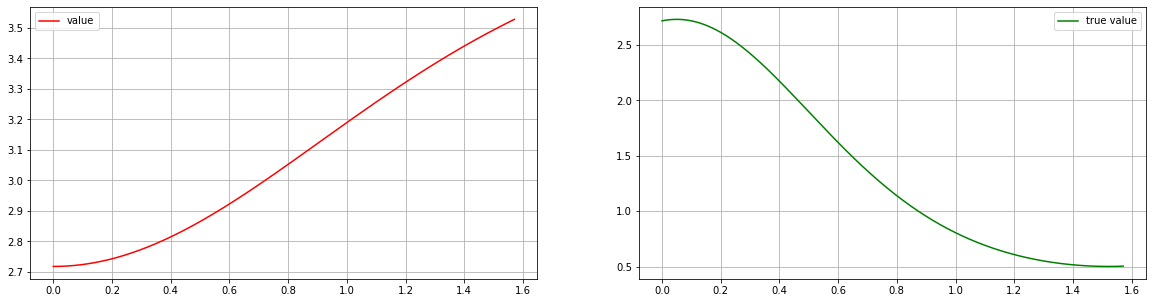

In [12]:
#Графики
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot(np.linspace(0, np.pi/2, 1000), [eilerFunc(y_0, t_0, np.pi/2000, i , function) for i in range(1000)], color = "red", label = "value")
axs[0].grid()
axs[0].legend()

axs[1].plot(np.linspace(0, np.pi/2, 1000), realDiffFunction(np.linspace(0, np.pi/2, 1000)), color = "green", label = "true value")
axs[1].grid()
axs[1].legend()


Можно заметить, что графики совпадают

Теперь вернемся к нашей точке $\frac{\pi}{4}$   
Слева график значения функции, зависящий от n (ось x это n, а ось у это значение)   
Справа график погрешности уточнения по рунге

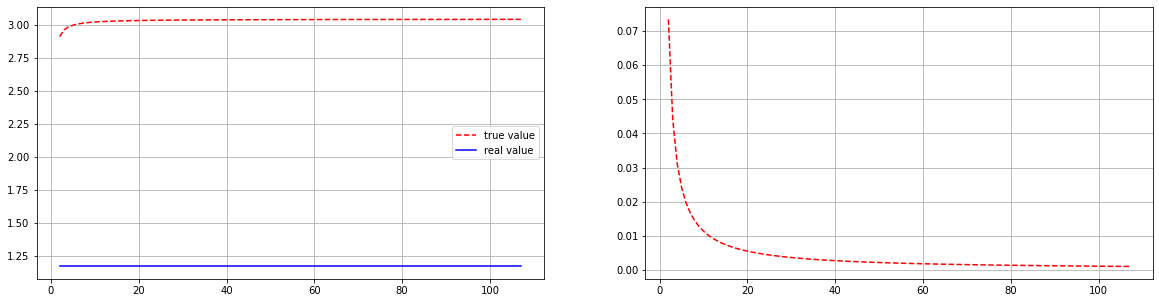

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot(n_list, value_list, color = 'red', ls = '--', label = 'true value')
axs[0].plot(n_list, [realDiffFunction(point)]*(n-1),  color = 'blue', label = "real value")
axs[0].grid()
axs[0].legend()

axs[1].plot(n_list, runge_epsilon_list, color = 'red', ls = '--', label = 'true value')
axs[1].grid()

 3. Составить  программу вычисления  решения с  заданной точностью методом 
     индивидуального варианта. Найти решение задачи с заданной точностью,   число точек N    
     и шаг, при котором точность достигается.   Построить график решения задачи.

In [15]:
#Метод Рунге-Кутты 2 порядка 
def rungekutte(y_0, t_0, h, n, main_func):
    current_y = y_0
    current_t = t_0
    for i in range(n):
        k_1 = main_func(current_t, current_y)
        k_2 = main_func(current_t + h, current_y + h*k_1)
        current_y = current_y + (h/2)*(k_1 + k_2)
        current_t = current_t + h
        #print('t{}: '.format(i + 1),current_t, " y{}: ".format(i + 1),current_y)
    return current_y


#Зададим точность
eps = 1e-6

#Возьмем точку в которой будем считать нашу фунцию
start_point = 0
point = np.pi/4
y_0 = np.e;
t_0 = 0

#Число разбиений
n = 2
h = (point - start_point)/n

#Метаданные для построения графиков
n_list = [2]
value_list = [rungekutte(y_0, t_0, h, n, function)]
runge_epsilon_list = [getRunge(y_0, t_0, h, n, rungekutte, function, 2)]

while np.abs(getRunge(y_0, t_0, h, n, rungekutte, function, 1)) > eps:
    n += 1
    h = (point - start_point)/n
    n_list.append(n)
    value_list.append(rungekutte(y_0, t_0, h, n, function))
    runge_epsilon_list.append(getRunge(y_0, t_0, h, n, rungekutte, function, 2))

In [16]:
print("Количество разбиений: ", n)
print("Разбиение: ",h)
print("Значение функции по n разбиеням h: ",rungekutte(y_0, t_0, h, n, function))
print("Реальное значение: ",realDiffFunction(point))
print("Eps",np.abs(rungekutte(y_0, t_0, h, n, function) - realDiffFunction(point)))
print("Eps по Рунге: ", getRunge(y_0, t_0, h, n, rungekutte, function, 1))

Количество разбиений:  128
Разбиение:  0.006135923151542565
Значение функции по n разбиеням h:  3.0437064306020973
Реальное значение:  1.170088787496422
Eps 1.8736176431056752
Eps по Рунге:  9.9297016431521e-07


Теперь построим графики реальной функции (справа) и нашей полученной функции (слева)

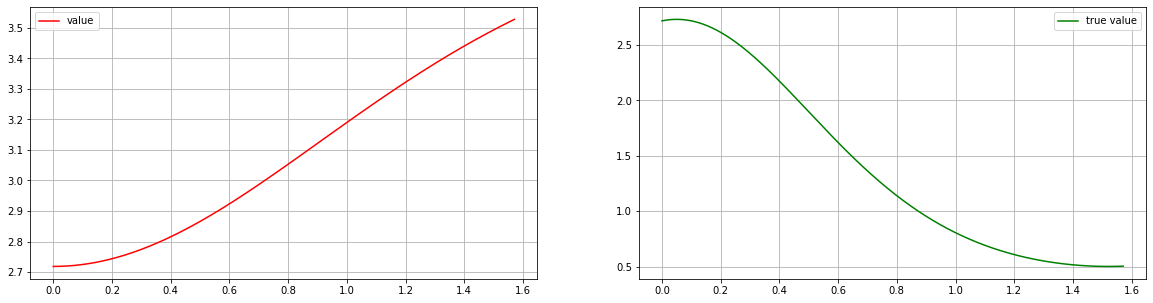

In [17]:
#Графики
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot(np.linspace(0, np.pi/2, 1000), [rungekutte(y_0, t_0, np.pi/2000, i, function) for i in range(1000)], color = "red", label = "value")
axs[0].grid()
axs[0].legend()

axs[1].plot(np.linspace(0, np.pi/2, 1000), realDiffFunction(np.linspace(0, np.pi/2, 1000)), color = "green", label = "true value")
axs[1].grid()
axs[1].legend()


Можно заметить, что графики совпадают

 4. Сравнить полученные результаты. 
 5. Оформить отчет по задаче   

Можно заметить, что Метод Рунге-Кутте, несмотря на большую точность (1e-6 в отличие от 1e-4 у метода эйлера) требует почти в 3.5 раза меньше итераций. Так же его график погрешности быстрее стремится к заданной. Связано это с большим порядком точности формулы (2). Но это, в свою очередь, требует больше операций с плавающей точкой. Так же важно отметить что реальный eps методов, немного больше заданного. Это связано с тем, что уточнение по Рунге высчитывалось для h/2, а ответ мы выводим для h. 

Теперь вернемся к нашей точке $\frac{\pi}{4}$   
Слева график значения функции, зависящий от n (ось x это n, а ось у это значение)   
Справа график погрешности уточнения по рунге

In [20]:
# fig, axs = plt.subplots(1, 2, figsize = (20, 5))

# axs[0].plot(n_list, value_list, color = 'green', ls = '--', label = 'true value')
# axs[0].plot(n_list, [realDiffFunction(point)]*(n-1),  color = 'blue', label = "real value")
# axs[0].grid()
# axs[0].legend()

# # axs[1].plot(n_list, runge_epsilon_list, color = 'red', ls = '--', label = Теперь вернемся к нашей точке $\frac{\pi}{4}$   
# # Слева график значения функции, зависящий от n (ось x это n, а ось у это значение)   
# # Справа график погрешности уточнения по рунге'true value')
# # axs[1].grid()

Итого: можно заметить, что при увеличении порядка точности функции, скорость падения ее погрешности возрастает. Но в то же время возрастает и необходимая вычислительная мощность, так как нам приходится выполнять больше операций с плавающей точной. С другой стороны, достижение той же точности методом с малым порядком, требует больше времени, но сами операции, выполняемые во время расчетов, гораздо проще

In [14]:
eilerFunc(2, np.pi/2, 0.2, 5, function)
getRunge(2, np.pi/2, 0.2, 5, eilerFunc, function, 1)

t1:  1.7707963267948965  y1:  2.4
t2:  1.9707963267948965  y2:  2.7136213049091973
t3:  2.1707963267948966  y3:  2.950587952822091
t4:  2.370796326794897  y4:  3.1238113802723317
t5:  2.570796326794897  y5:  3.245900678275911
t1:  1.6707963267948966  y1:  2.2
t2:  1.7707963267948967  y2:  2.379100749750045
t3:  1.8707963267948968  y3:  2.537959667871836
t4:  1.970796326794897  y4:  2.6776337156573713
t5:  2.070796326794897  y5:  2.7994317160866236
t6:  2.170796326794897  y6:  2.9047914951187264
t7:  2.270796326794897  y7:  2.995182953601776
t8:  2.3707963267948973  y8:  3.0720356003605716
t9:  2.4707963267948974  y9:  3.136687502686982
t10:  2.5707963267948974  y10:  3.1903518680932232
t1:  1.7707963267948965  y1:  2.4
t2:  1.9707963267948965  y2:  2.7136213049091973
t3:  2.1707963267948966  y3:  2.950587952822091
t4:  2.370796326794897  y4:  3.1238113802723317
t5:  2.570796326794897  y5:  3.245900678275911


-0.05554881018268798

In [17]:
rungekutte(2, np.pi/2, 0.2, 5, function)
getRunge(2, np.pi/2, 0.2, 5, rungekutte, function, 2)

t1:  1.7707963267948965  y1:  2.3568106524545986
t2:  1.9707963267948965  y2:  2.639535733380877
t3:  2.1707963267948966  y3:  2.8564426761742503
t4:  2.370796326794897  y4:  3.0173456460419135
t5:  2.570796326794897  y5:  3.1315028198875265
t1:  1.6707963267948966  y1:  2.1895503748750222
t2:  1.7707963267948967  y2:  2.359511195432224
t3:  1.8707963267948968  y3:  2.5105816547127318
t4:  1.970796326794897  y4:  2.6437658278278695
t5:  2.070796326794897  y5:  2.760253652203013
t6:  2.170796326794897  y6:  2.8613232394301154
t7:  2.270796326794897  y7:  2.948264207808478
t8:  2.3707963267948973  y8:  3.022320176287665
t9:  2.4707963267948974  y9:  3.084647690050104
t10:  2.5707963267948974  y10:  3.136288505481494
t1:  1.7707963267948965  y1:  2.3568106524545986
t2:  1.9707963267948965  y2:  2.639535733380877
t3:  2.1707963267948966  y3:  2.8564426761742503
t4:  2.370796326794897  y4:  3.0173456460419135
t5:  2.570796326794897  y5:  3.1315028198875265


0.0015952285313224717